<h1> Temporal Data Exploration </h1>
In this notebook we explore the data from a temporal point of view, i.e we look at the change of features along a patient ICU stay.
As explained, we filtered the data so for each patient we explore only the last 10 hours in the ICU according to the dataset

In [3]:
import pandas as pd
import os
import tqdm

In [1]:
TRAIN_PATH = '/home/student/filtered_train_df_0705_LSTM_new.csv'
VAL_PATH = '/home/student/filtered_val_df_0705_LSTM_new.csv'

In [4]:
df = pd.read_csv(TRAIN_PATH)
df = df.append(pd.read_csv(VAL_PATH))

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns;
sns.set(style="white", color_codes=True)
def plot_results(cols,rows, cols_names,df, types, title=None, fsize = (20,20), tight_layouts = None, sharey=False,sharex=False):
    """
    This is a basic plotting function which plots figures according to given parameters.
    """
    fig,axes = plt.subplots(rows,cols, figsize=fsize, sharey=sharey,sharex=sharex)
    if tight_layouts:
        fig.tight_layout(pad=tight_layouts)
    axes = axes.ravel()
    for i,col in enumerate(cols_names):
        type = types[i]
        # if col!='Label':
        if type=='hist':
            sns.histplot(x=col,hue='Label',data=df, multiple="dodge", ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        if type=='dist':
            sns.distplot(df[df['Label']==1][col], color='r',ax=axes[i])
            sns.distplot(df[df['Label']==0][col],ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='ts':
            axes[i].plot(df[df['Label']==1]['time_bm'],df[df['Label']==1][col], color='r',label=1)
            axes[i].plot(df[df['Label']==0]['time_bm'],df[df['Label']==0][col], color='b', label=0)
            axes[i].set_title(col)
            if i==0:
                axes[i].legend()
        elif type=='count':
            sns.countplot(x=col, hue='Label', data=df, ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='box':
            sns.boxplot(x=col, hue='Label', data=df, ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='boxen':
            sns.boxplot(x=col, hue='Label', data=df, ax=axes[i])
            axes[i].set_title(col+' distribution by label')

        # else:
        #     sns.histplot(x=col,data=df, color='g',ax=axes[i])
        #     axes[i].set_title(col+' distribution')
    if title:
        plt.suptitle(title)

In [6]:
cols = list(df.columns)
cols.remove('Label')
cols.remove('time_bm')
df_means = df.groupby(by=['Label','time_bm']).agg({x: 'mean' if x!='ID' else 'count' for x in cols}).reset_index()
freq_features = [x for x in list(cols) if 'freq' in x]
Not_freq_features =  [x for x in list(cols) if 'freq' not in x and x not in ['Gender','max_ICULOS','Label','time_bm','ID','ICULOS']]

<h2> Vital Signs Exploration </h2>

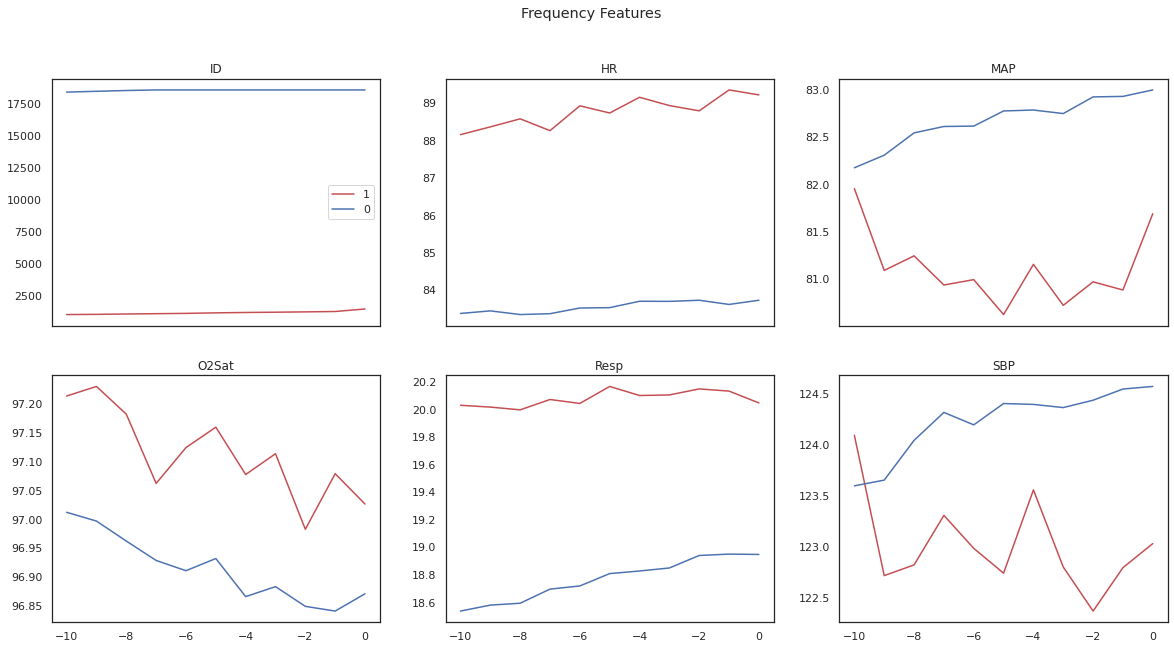

In [115]:
plot_results(3,2,['ID']+Not_freq_features,df_means,['ts']*11, title='Frequency Features', fsize=(20,10), sharex=True)

<h2> Frequency of lab results Exploration </h2>
Weve made 2 versions of this graphs. the first one is with shares Y axis, the next one is "zoomed" in and each graph has a different y axis.

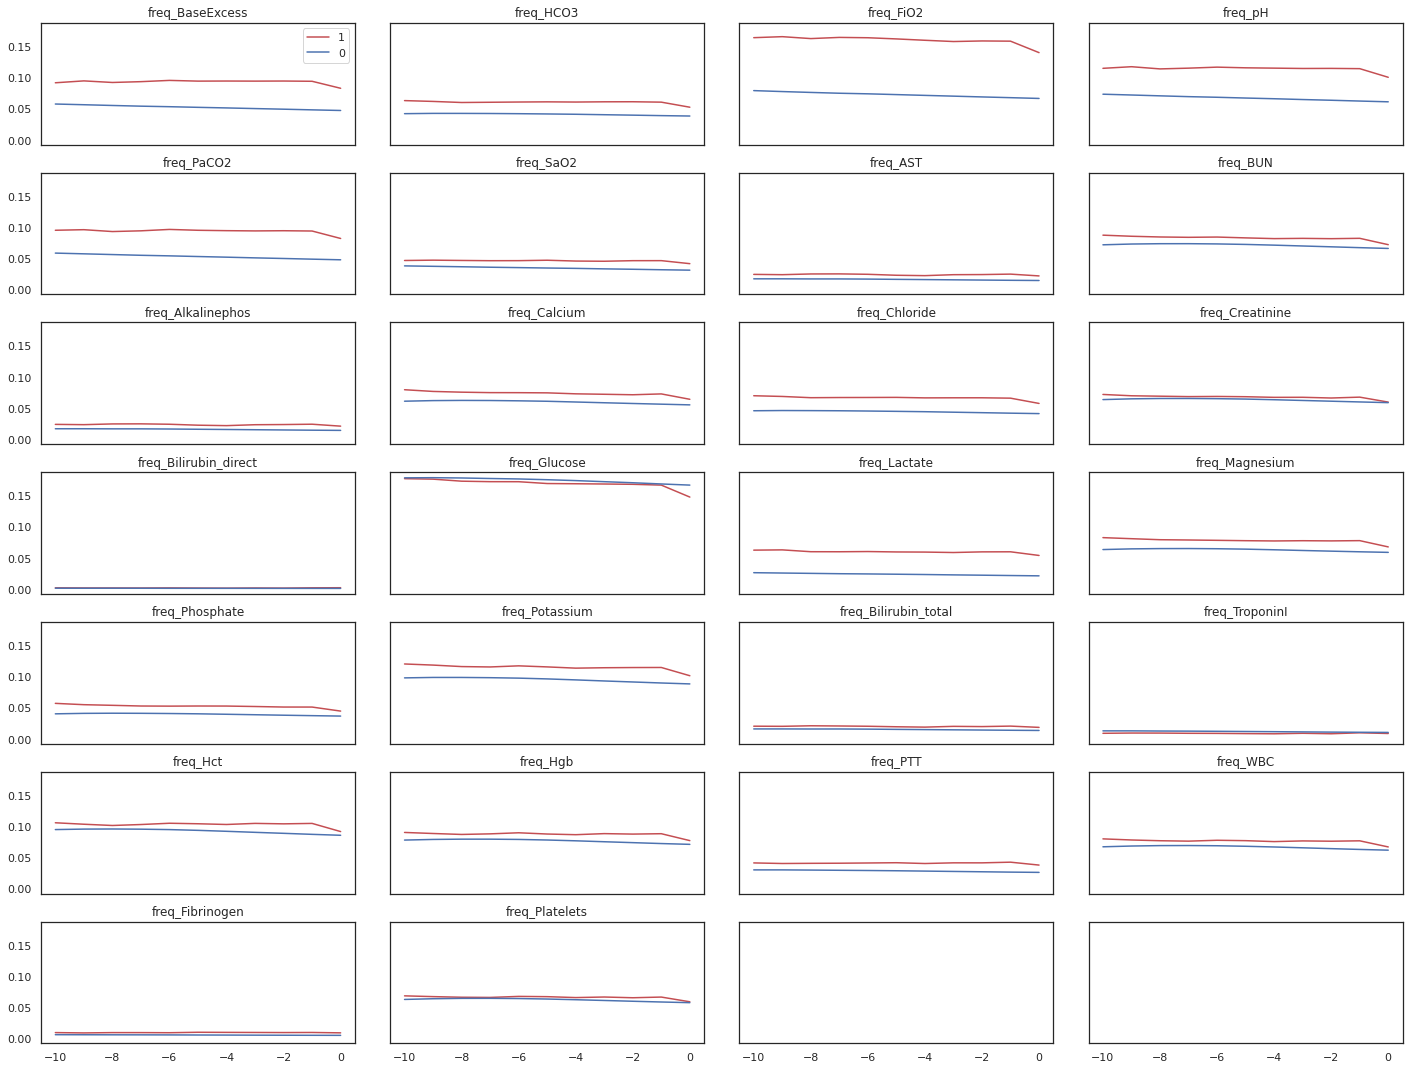

In [113]:
plot_results(4,7,freq_features,df_means,['ts']*26,fsize=(20,15),tight_layouts=1.5,sharey=True, sharex=True)

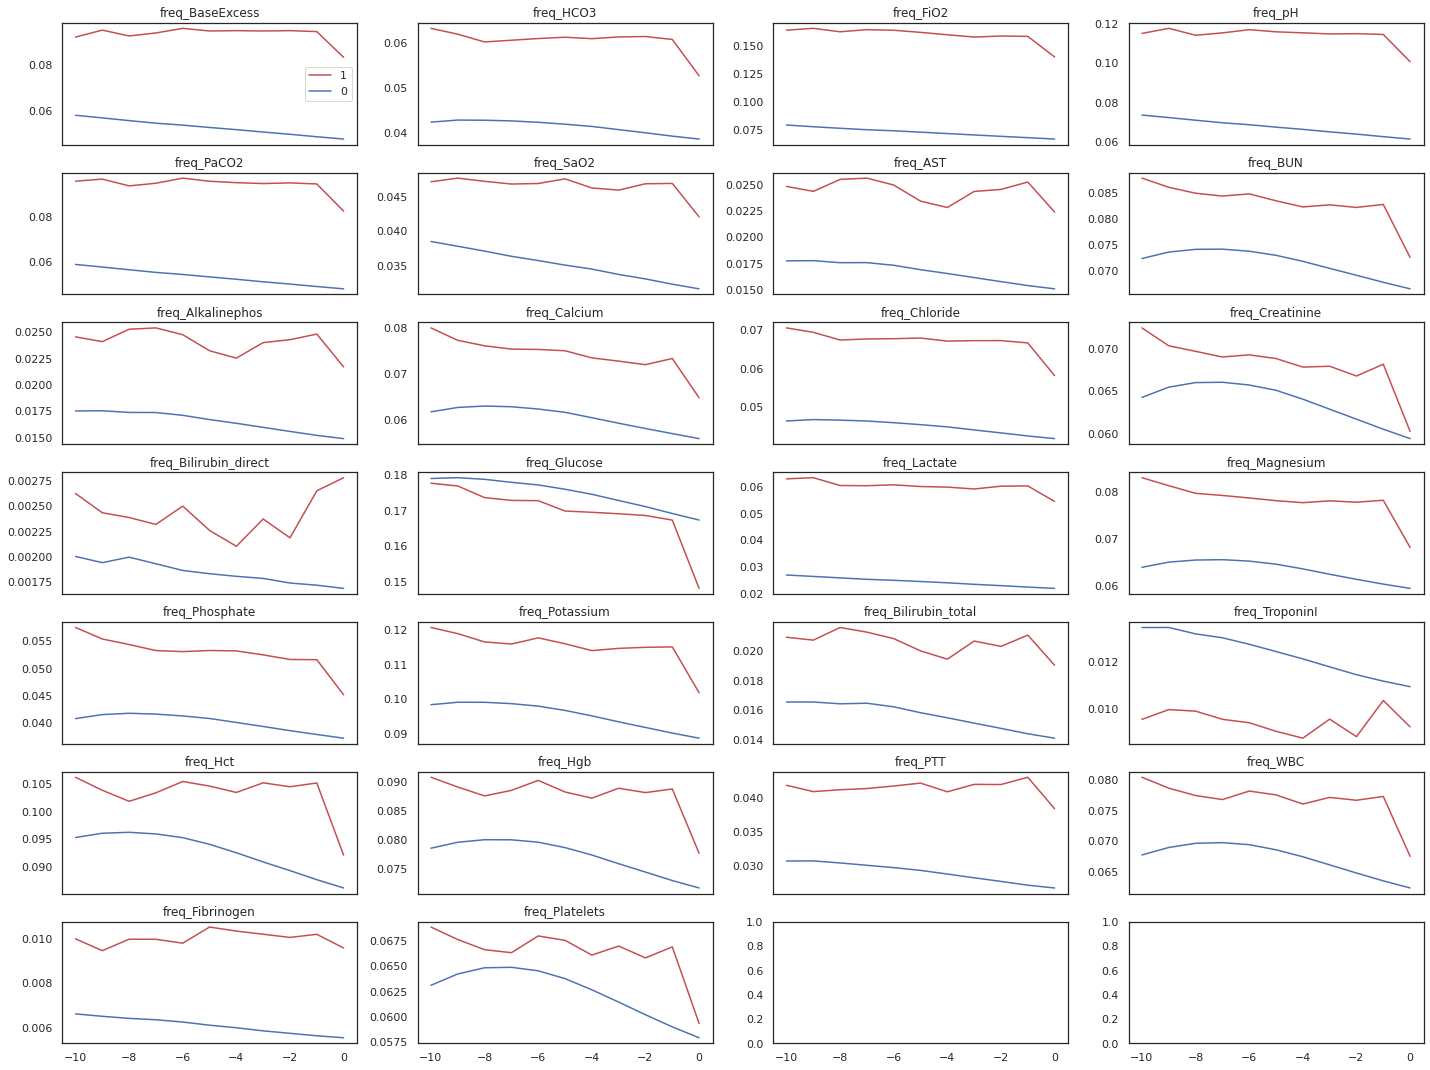

In [114]:
plot_results(4,7,freq_features,df_means,['ts']*26,fsize=(20,15),tight_layouts=1.5, sharex=True)

<h2> Correlations </h2>
We used df.corr to calculate the correlation between the Label column and the other columns in each hour (i.e -10 hours before SepsisLabel turns to 1 to the hour where it turns to 1 in patientes who had sepsis, and -10 hours before last hour logged for other patients.
The heatmaps below shows the correlations between label columns and other feature. we can see little to no correlation in each feature.

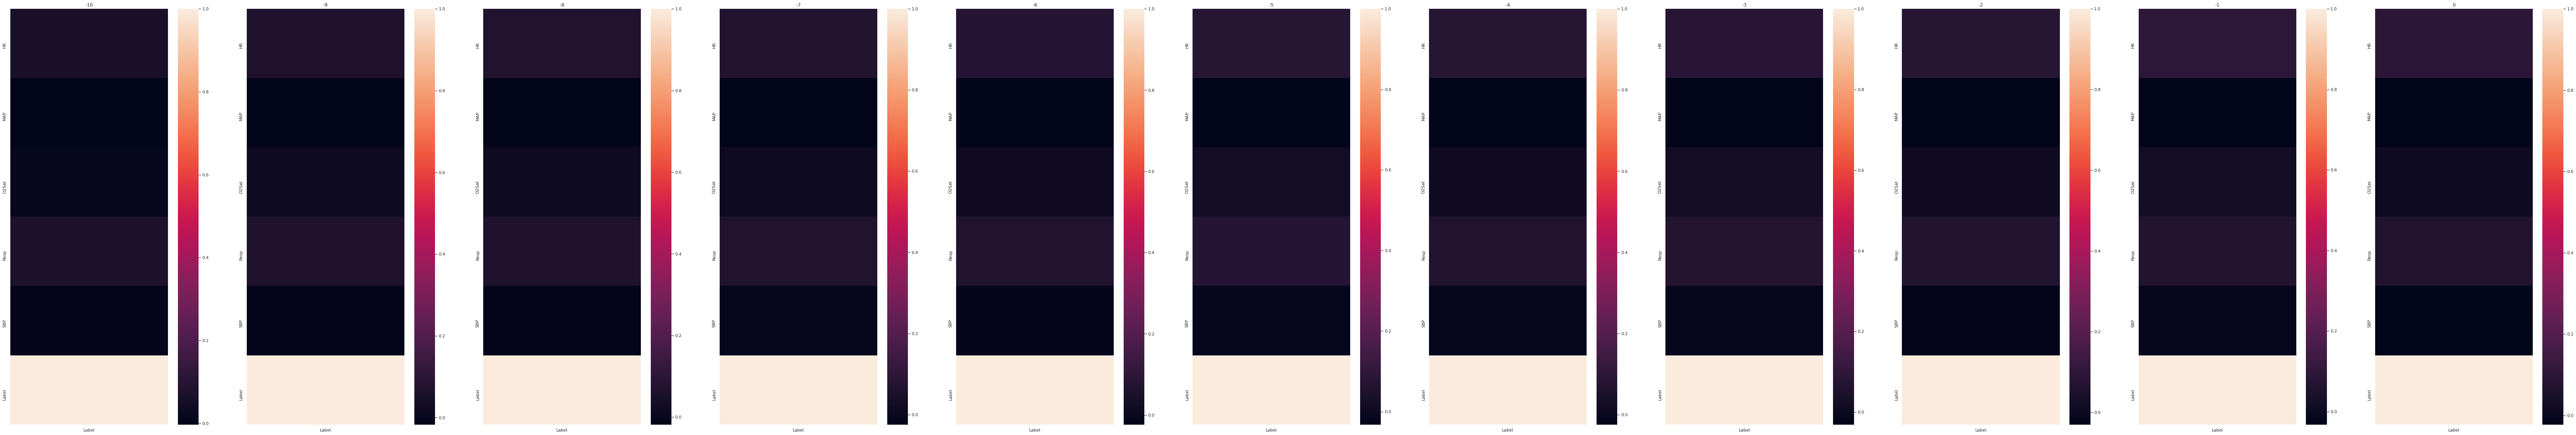

In [7]:
fig,axes = plt.subplots(1,11, figsize=(120,30))
# axes = axes.ravel()
for i in range(11):
    sns.heatmap(df[df['time_bm']==-10+i][Not_freq_features+['Label']].corr()[['Label']], ax=axes[i])
    axes[i].set_title(-10+i)

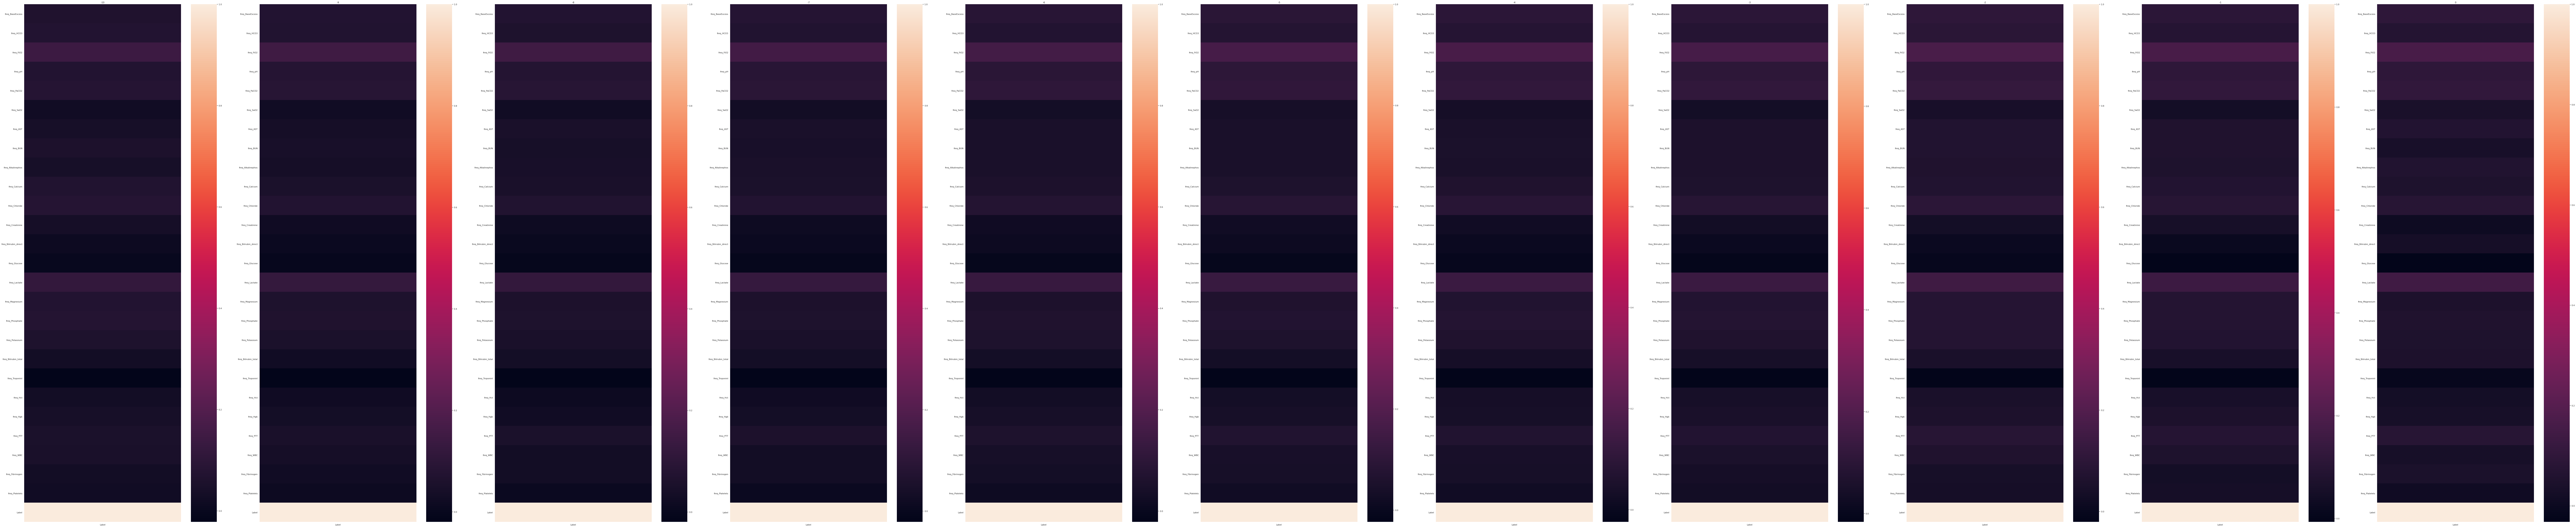

In [9]:
fig,axes = plt.subplots(1,11, figsize=(240,50))
# axes = axes.ravel()
for i in range(11):
    sns.heatmap(df[df['time_bm']==-10+i][freq_features+['Label']].corr()[['Label']], ax=axes[i])
    axes[i].set_title(-10+i)

In [84]:
sns.heatmap(df[df['time_bm']==0][Not_freq_features+['Label']].corr())

,max_ICULOS,Gender,HR,MAP,O2Sat,Resp,SBP,ICULOS,freq_BaseExcess,freq_HCO3,...,freq_TroponinI,freq_Hct,freq_Hgb,freq_PTT,freq_WBC,freq_Fibrinogen,freq_Platelets,time_bm,Label,ID
max_ICULOS,1.000000,0.000943,0.063032,0.013139,0.008499,0.058524,0.027373,1.000000,0.060750,0.035110,...,-0.076576,0.018036,0.019327,0.042838,0.006346,0.032284,0.009393,NaN,0.155717,0.024658
Gender,0.000943,1.000000,-0.021364,0.009510,-0.040508,0.003047,-0.002677,0.000943,0.067795,0.038491,...,-0.007430,0.065003,0.047077,0.048262,0.035960,0.033596,0.036259,NaN,0.014115,0.039511
HR,0.063032,-0.021364,1.000000,0.063328,-0.042103,0.195502,-0.029138,0.063032,0.073838,0.031688,...,-0.055270,0.068568,0.063089,0.034243,0.037634,0.043701,0.043644,NaN,0.093479,0.009008
MAP,0.013139,0.009510,0.063328,1.000000,0.059628,0.039365,0.739185,0.013139,-0.182460,-0.180225,...,0.084974,-0.148429,-0.104635,-0.105674,-0.076051,0.006916,-0.038061,NaN,-0.022897,-0.186096
O2Sat,0.008499,-0.040508,-0.042103,0.059628,1.000000,-0.085673,0.050492,0.008499,-0.014017,0.006790,...,0.001288,0.002738,0.009554,0.008158,0.002119,-0.001192,0.011324,NaN,0.013047,0.011075
Resp,0.058524,0.003047,0.195502,0.039365,-0.085673,1.000000,0.036337,0.058524,0.024156,-0.004951,...,0.008800,-0.015650,-0.012905,-0.008645,-0.019708,-0.035992,-0.014763,NaN,0.065620,0.016725
SBP,0.027373,-0.002677,-0.029138,0.739185,0.050492,0.036337,1.000000,0.027373,-0.097146,-0.076435,...,0.031427,-0.073090,-0.057430,-0.057575,-0.029860,0.008691,-0.028450,NaN,-0.019971,-0.083435
ICULOS,1.000000,0.000943,0.063032,0.013139,0.008499,0.058524,0.027373,1.000000,0.060750,0.035110,...,-0.076576,0.018036,0.019327,0.042838,0.006346,0.032284,0.009393,NaN,0.155717,0.024658
freq_BaseExcess,0.060750,0.067795,0.073838,-0.182460,-0.014017,0.024156,-0.097146,0.060750,1.000000,0.574057,...,-0.154366,0.599475,0.524183,0.373200,0.393780,0.196996,0.270711,NaN,0.092950,0.375122
freq_HCO3,0.035110,0.038491,0.031688,-0.180225,0.006790,-0.004951,-0.076435,0.035110,0.574057,1.000000,...,-0.228880,0.630669,0.564856,0.485292,0.592438,0.217917,0.348429,NaN,0.068044,0.551256
